In [10]:
import pandas as pd

red_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-red.csv'
white_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine, white_wine])

In [11]:
X = wine.drop(['color'], axis=1)
y = wine['color']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [13]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [14]:
pipe.steps[0]

('scaler', StandardScaler())

In [15]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [16]:
pipe[0]

StandardScaler()

In [17]:
pipe['scaler']

StandardScaler()

In [18]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [20]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


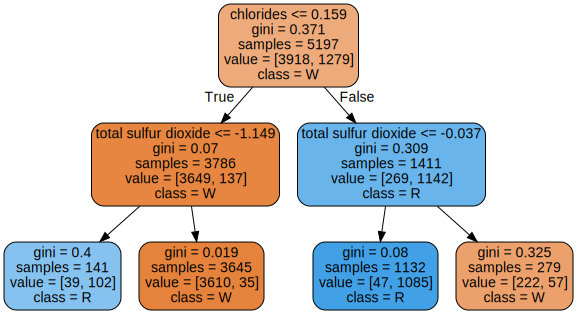

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(pipe['clf'], feature_names=X.columns, class_names=['W', 'R'], rounded=True, filled=True))

In [23]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1,2], [3,4], [1,2], [3,4]])
y = np.array([1,2,3,4])
kf = KFold(n_splits=2)

print (kf.get_n_splits(X))
print(kf)

for train_idx, test_idx in kf.split(X):
    print('--- idx')
    print(train_idx, test_idx)
    print('--- train data')
    print(X[train_idx])
    print('--- var data')
    print(X[test_idx])

2
KFold(n_splits=2, random_state=None, shuffle=False)
--- idx
[2 3] [0 1]
--- train data
[[1 2]
 [3 4]]
--- var data
[[1 2]
 [3 4]]
--- idx
[0 1] [2 3]
--- train data
[[1 2]
 [3 4]]
--- var data
[[1 2]
 [3 4]]


In [24]:
import pandas as pd

red_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-red.csv'
white_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.
wine = pd.concat([red_wine, white_wine])

In [25]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [27]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [28]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [30]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [33]:
np.mean(cv_accuracy)

0.709578255462782

In [34]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cv_accuracy = []

for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

cv_accuracy   

[0.6007692307692307,
 0.6884615384615385,
 0.7090069284064665,
 0.7628945342571208,
 0.7867590454195535]

In [35]:
np.mean(cv_accuracy)

0.709578255462782

In [37]:
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skfold)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

In [38]:
from sklearn.model_selection import cross_validate
cross_validate(wine_tree_cv, X, y, scoring=None, cv=skfold, return_train_score=True)

{'fit_time': array([0.00841713, 0.00800705, 0.00813603, 0.00772595, 0.00853419]),
 'score_time': array([0.00189376, 0.001858  , 0.00194883, 0.00180507, 0.00217319]),
 'test_score': array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595]),
 'train_score': array([0.74773908, 0.74696941, 0.74317045, 0.73509042, 0.73258946])}

In [39]:
import pandas as pd

red_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-red.csv'
white_url='https://raw.githubusercontent.com/PinkWink/ML_tutorial'+'/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [41]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00830159, 0.01294975, 0.01550083, 0.02028365]),
    'mean_score_time': array([0.00197659, 0.00190525, 0.00141492, 0.00135975]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7251732

In [42]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [43]:
gridsearch.best_score_

0.6888004974240539

In [44]:
gridsearch.best_params_

{'max_depth': 2}

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [46]:
param_grid = [ {'clf__max_depth' : [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [49]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [50]:
GridSearch.best_score_

0.6888004974240539

In [51]:
GridSearch.best_params_

{'clf__max_depth': 2}

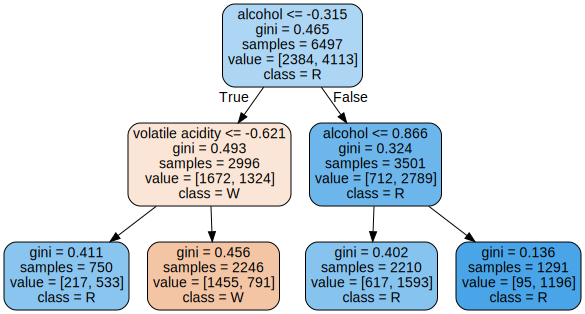

In [53]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(GridSearch.best_estimator_['clf'], feature_names=X.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled=True))

In [54]:
import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
